# telecharger les données à partir du wikipedia

In [7]:
!pip install wikipedia
!pip install wordcloud

Populating the interactive namespace from numpy and matplotlib


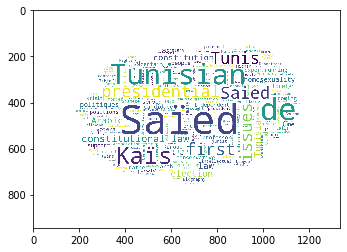

In [29]:
import sys
from os import path
import numpy as np
from PIL import Image
import wikipedia
from wordcloud import WordCloud, STOPWORDS
# get path to script's directory
currdir = path.dirname("C:/Users/Kon-boot/Desktop")

def get_wiki(query):
    # get best matching title for given query
    title = wikipedia.search(query)[0]
    # get wikipedia page for selected title
    page = wikipedia.page(title)
    return page.content


def create_wordcloud(text):
    # create numpy araay for wordcloud mask image
    mask = np.array(Image.open(path.join(currdir, "cloud.png")))

    # create set of stopwords   
    stopwords = set(STOPWORDS)
       # create wordcloud object
    wc = WordCloud(background_color="white",
                    max_words=200,
                    mask=mask,
                       stopwords=stopwords)
   
    # generate wordcloud
    wc.generate(text)

    # save wordcloud
    wc.to_file(path.join(currdir, "word_cloud.png"))



# get query
query = sys.argv[1]
# get text for given query
text = get_wiki("saied")
# generate wordcloud
create_wordcloud(text)

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread("word_cloud.png")
imgplot = plt.imshow(img)
plt.show()

 

In [30]:
title=wikipedia.search("kais said")[0]
Kais=wikipedia.page(title)
Kais.content

'Kaïs Saïed (Arabic: قيس سعيد\u200e) (born 22 February 1958), is a Tunisian jurist and professor of constitutional law who is running as an Independent in the 2019 Tunisian presidential election.\n\n\n== Biography ==\nKaïs Saïed is the son of Moncef Saïed from Beni Khiar (Cap Bon) and Lalla Zakia, a family of modest but intellectual origin. His paternal uncle Hicham Saïed was the first pediatric surgeon in Tunisia, known worldwide for separating Siamese twins in the 1970s.Saïed is a professor at the Université de Tunis.  Saïed served as the Secretary-General of the Tunisian Association of Constitutional Law between 1990 and 1995 and has been the vice president of the organization since 1995.  Saïed also served as Dean of the Law Department at the University of Sousse, as a legal expert for the Arab League and the Arab Institute for Human Rights.  Saïed was also a member of the expert committee which was invited to offer comments to the draft Constitution of Tunisia in 2014.\n\n\n== 201

In [31]:
#analyse des sentiments
!pip install textblob
from textblob import TextBlob

In [32]:
resultat=TextBlob('Kais')
resultat.sentiment
#polarity=1 cad heureux
#subjectivité = neutralité

Sentiment(polarity=0.0, subjectivity=0.0)

In [33]:
resultat.translate(to="ar")

TextBlob("قيس")

# telecharger les données à partir de twitter

In [35]:
!pip install tweepy

In [36]:
!pip install tweepy

In [37]:
import sys,tweepy,csv,re
from textblob import TextBlob
import matplotlib.pyplot as plt


class SentimentAnalysis:

    def __init__(self):
        self.tweets = []
        self.tweetText = []

    def DownloadData(self):
        # authenticating
        #Twitter API credentials

        consumerKey = 'tiVIII7j3O9bPAbRgdJWmoJWd'
        consumerSecret = 'SR5KZuyzFgXkXvd0tADD8qFDfYzQ0mXBaTTvgDq0SagnHlWLEU'
        accessToken = '490394724-yTbJ770PfbqAqdiejo8IfEEKkIKTTtmTNodZI0ru'
        accessTokenSecret = '3qouPTCCnp6t1tfV6NjcXbJ4ulQ4wJ5WQt9QZzwURuTGo'
        auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
        auth.set_access_token(accessToken, accessTokenSecret)
        api = tweepy.API(auth)

        # input for term to be searched and how many tweets to search
        searchTerm = input("Enter Keyword/Tag to search about: ")
        NoOfTerms = int(input("Enter how many tweets to search: "))

        # searching for tweets
        self.tweets = tweepy.Cursor(api.search, q=searchTerm, lang = "en").items(NoOfTerms)

        # Open/create a file to append data to
        csvFile = open('result.csv', 'a')

        # Use csv writer
        csvWriter = csv.writer(csvFile)


        # creating some variables to store info
        polarity = 0
        positive = 0
        wpositive = 0
        spositive = 0
        negative = 0
        wnegative = 0
        snegative = 0
        neutral = 0


        # iterating through tweets fetched
        for tweet in self.tweets:
            #Append to temp so that we can store in csv later. I use encode UTF-8
            self.tweetText.append(self.cleanTweet(tweet.text).encode('utf-8'))
            # print (tweet.text.translate(non_bmp_map))    #print tweet's text
            analysis = TextBlob(tweet.text)
            # print(analysis.sentiment)  # print tweet's polarity
            polarity += analysis.sentiment.polarity  # adding up polarities to find the average later

            if (analysis.sentiment.polarity == 0):  # adding reaction of how people are reacting to find average later
                neutral += 1
            elif (analysis.sentiment.polarity > 0 and analysis.sentiment.polarity <= 0.3):
                wpositive += 1
            elif (analysis.sentiment.polarity > 0.3 and analysis.sentiment.polarity <= 0.6):
                positive += 1
            elif (analysis.sentiment.polarity > 0.6 and analysis.sentiment.polarity <= 1):
                spositive += 1
            elif (analysis.sentiment.polarity > -0.3 and analysis.sentiment.polarity <= 0):
                wnegative += 1
            elif (analysis.sentiment.polarity > -0.6 and analysis.sentiment.polarity <= -0.3):
                negative += 1
            elif (analysis.sentiment.polarity > -1 and analysis.sentiment.polarity <= -0.6):
                snegative += 1


        # Write to csv and close csv file
        csvWriter.writerow(self.tweetText)
        csvFile.close()

        # finding average of how people are reacting
        positive = self.percentage(positive, NoOfTerms)
        wpositive = self.percentage(wpositive, NoOfTerms)
        spositive = self.percentage(spositive, NoOfTerms)
        negative = self.percentage(negative, NoOfTerms)
        wnegative = self.percentage(wnegative, NoOfTerms)
        snegative = self.percentage(snegative, NoOfTerms)
        neutral = self.percentage(neutral, NoOfTerms)

        # finding average reaction
        polarity = polarity / NoOfTerms

        # printing out data
        print("How people are reacting on " + searchTerm + " by analyzing " + str(NoOfTerms) + " tweets.")
        print()
        print("General Report: ")

        if (polarity == 0):
            print("Neutral")
        elif (polarity > 0 and polarity <= 0.3):
            print("Weakly Positive")
        elif (polarity > 0.3 and polarity <= 0.6):
            print("Positive")
        elif (polarity > 0.6 and polarity <= 1):
            print("Strongly Positive")
        elif (polarity > -0.3 and polarity <= 0):
            print("Weakly Negative")
        elif (polarity > -0.6 and polarity <= -0.3):
            print("Negative")
        elif (polarity > -1 and polarity <= -0.6):
            print("Strongly Negative")

        print()
        print("Detailed Report: ")
        print(str(positive) + "% people thought it was positive")
        print(str(wpositive) + "% people thought it was weakly positive")
        print(str(spositive) + "% people thought it was strongly positive")
        print(str(negative) + "% people thought it was negative")
        print(str(wnegative) + "% people thought it was weakly negative")
        print(str(snegative) + "% people thought it was strongly negative")
        print(str(neutral) + "% people thought it was neutral")

        self.plotPieChart(positive, wpositive, spositive, negative, wnegative, snegative, neutral, searchTerm, NoOfTerms)


    def cleanTweet(self, tweet):
        # Remove Links, Special Characters etc from tweet
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) | (\w +:\ / \ / \S +)", " ", tweet).split())

    # function to calculate percentage
    def percentage(self, part, whole):
        temp = 100 * float(part) / float(whole)
        return format(temp, '.2f')

    def plotPieChart(self, positive, wpositive, spositive, negative, wnegative, snegative, neutral, searchTerm, noOfSearchTerms):
        labels = ['Positive [' + str(positive) + '%]', 'Weakly Positive [' + str(wpositive) + '%]','Strongly Positive [' + str(spositive) + '%]', 'Neutral [' + str(neutral) + '%]',
                  'Negative [' + str(negative) + '%]', 'Weakly Negative [' + str(wnegative) + '%]', 'Strongly Negative [' + str(snegative) + '%]']
        sizes = [positive, wpositive, spositive, neutral, negative, wnegative, snegative]
        colors = ['yellowgreen','lightgreen','darkgreen', 'gold', 'red','lightsalmon','darkred']
        patches, texts = plt.pie(sizes, colors=colors, startangle=90)
        plt.legend(patches, labels, loc="best")
        plt.title('How people are reacting on ' + searchTerm + ' by analyzing ' + str(noOfSearchTerms) + ' Tweets.')
        plt.axis('equal')
        plt.tight_layout()
        plt.show()

In [38]:
object=SentimentAnalysis()

Enter Keyword/Tag to search about:  kaies
Enter how many tweets to search:  100


How people are reacting on kaies by analyzing 100 tweets.

General Report: 
Weakly Positive

Detailed Report: 
4.00% people thought it was positive
3.00% people thought it was weakly positive
0.00% people thought it was strongly positive
0.00% people thought it was negative
0.00% people thought it was weakly negative
0.00% people thought it was strongly negative
0.00% people thought it was neutral


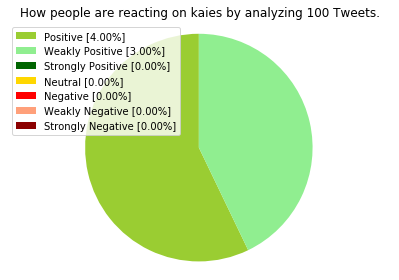

In [39]:
object.DownloadData()